#### Setting up Colab

To run this notebook on [Google's Colab](https://colab.research.google.com), you will need to perform the following steps.

Step 1. Install pyspark

Since pyspark isn't included in Colab's Python installation, you will need to install it each time you open this notebook.

In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 34 kB/s 
     |████████████████████████████████| 199 kB 56.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=4761cd53dd1371ebb71d7149f239c331ee35d6db055f83fd8801b4d49a2ea6f4
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [2]:
!pip install composable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 3.4 MB/s 
  Attempting uninstall: toolz
    Found existing installation: toolz 0.12.0
    Uninstalling toolz-0.12.0:
      Successfully uninstalled toolz-0.12.0


Step 2. Download and unzip the data

Next, the easiest way to access the data from the module is to download and unzip.

In [3]:
!wget https://github.com/wsu-stat489/module5_intro_to_pyspark/raw/main/data.zip

--2022-10-11 13:59:27--  https://github.com/wsu-stat489/module5_intro_to_pyspark/raw/main/data.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/wsu-stat489/module5_intro_to_pyspark/main/data.zip [following]
--2022-10-11 13:59:27--  https://raw.githubusercontent.com/wsu-stat489/module5_intro_to_pyspark/main/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14959102 (14M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]  14.27M  --.-KB/s    in 0.1s    

2022-10-11 13:59:27 (122 MB/s) - ‘data.zip’ saved [14959102/14959102]



In [4]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: __MACOSX/._data         
  inflating: data/Rochester_temps_2019.xlsx  
  inflating: __MACOSX/data/._Rochester_temps_2019.xlsx  
  inflating: data/uber-raw-data-jun14-sample.csv  
  inflating: __MACOSX/data/._uber-raw-data-jun14-sample.csv  
  inflating: data/heroes_information.csv  
  inflating: __MACOSX/data/._heroes_information.csv  
  inflating: data/employee.csv       
  inflating: __MACOSX/data/._employee.csv  
  inflating: data/uber-raw-data-apr14-sample.csv  
  inflating: __MACOSX/data/._uber-raw-data-apr14-sample.csv  
   creating: data/baseball/
  inflating: __MACOSX/data/._baseball  
  inflating: data/uber-raw-data-may14-sample.csv  
  inflating: __MACOSX/data/._uber-raw-data-may14-sample.csv  
  inflating: data/auto_sales_apr.csv  
  inflating: __MACOSX/data/._auto_sales_apr.csv  
  inflating: data/uber-raw-data-sep14-sample.csv  
  inflating: __MACOSX/data/._uber-raw-data-sep14-sample.csv  
  inflating: data/department.csv 

In [5]:
!wget https://github.com/wsu-stat489/module5_intro_to_pyspark/raw/main/more_pyspark.py

--2022-10-11 13:59:28--  https://github.com/wsu-stat489/module5_intro_to_pyspark/raw/main/more_pyspark.py
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/wsu-stat489/module5_intro_to_pyspark/main/more_pyspark.py [following]
--2022-10-11 13:59:28--  https://raw.githubusercontent.com/wsu-stat489/module5_intro_to_pyspark/main/more_pyspark.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2786 (2.7K) [text/plain]
Saving to: ‘more_pyspark.py’

more_pyspark.py     100%[===================>]   2.72K  --.-KB/s    in 0s      

2022-10-11 13:59:28 (29.5 MB/s) - ‘more_pyspark.py’ saved [2786/2786]



# Aggregation

## What is aggregation?

The act of collapsing many rows into few rows.

In [1]:
from pyspark.sql import SparkSession
from more_pyspark import get_spark_types, to_pandas

spark = SparkSession.builder.appName('Ops').getOrCreate()
pitching_spark =  spark.read.csv('data/baseball/core/Pitching.csv', inferSchema=True, header=True)

22/10/30 21:24:24 WARN Utils: Your hostname, jt7372wd222 resolves to a loopback address: 127.0.1.1; using 172.21.221.52 instead (on interface eth0)
22/10/30 21:24:24 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/10/30 21:24:25 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/10/30 21:24:27 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [2]:
(pitching_spark
 .take(5)
) >> to_pandas

22/10/30 21:24:34 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NA,1,2,3,3,2,...,None,7,None,0,146,0,42,None,None,None
1,brainas01,1871,1,WS3,NA,12,15,30,30,30,...,None,7,None,0,1291,0,292,None,None,None
2,fergubo01,1871,1,NY2,NA,0,0,1,0,0,...,None,2,None,0,14,0,9,None,None,None
3,fishech01,1871,1,RC1,NA,4,16,24,24,22,...,None,20,None,0,1080,1,257,None,None,None
4,fleetfr01,1871,1,NY2,NA,0,1,1,1,1,...,None,0,None,0,57,0,21,None,None,None


## Simple Aggregation

A **simple aggregation** collapses all rows into one row.

<img src="https://github.com/wsu-stat489/module5_intro_to_pyspark/blob/main/img/simple_aggregation.png?raw=1" width=800>

## Simple aggregation in `pyspark`

#### Using aggregation functions with an alias

In [3]:
import pyspark.sql.functions as fn
(pitching_spark
  .agg(fn.mean('ERA').alias('mean_ers'),
       fn.stddev('ERA').alias('sd_era'),
       fn.max('W').alias('max_wins'),
       fn.min('W').alias('min_wins'))
  .collect()
) >> to_pandas

,mean_ers,sd_era,max_wins,min_wins
0,5.11792,5.466654,60,0


#### Using column expressions

In [8]:
from pyspark.sql.functions import mean, stddev, col
(pitching_spark
  .agg(mean(col('ERA')).alias('mean_ers'),
       stddev(col('ERA')).alias('sd_era'))
  .collect()
) >> to_pandas

,mean_ers,sd_era
0,5.11792,5.466654


## <font color="red"> Exercise 1 </font>

The [dead ball era](https://en.wikipedia.org/wiki/Dead-ball_era) in MLB includes the year from about 1900 to 1918, which was known for a low number of runs per game.  After this period, the number of runs per game increased dramatically and one possible reason for this change was a changes made to the baseball at the start of the 1920 season.    

**Tasks:** Complete that following tasks using `pyspark.sql`

* Compute the average runs allowed per pitcher (column `R`) for the following two ranges of years: 
    * 1900-1919 and 
    * 1920-1939.  
* Is there evidence of a difference in the number of runs allowed for each era?

In [10]:
# Your code here

(pitching_spark
  .where((col('yearID') >= 1900) & (col('yearID') < 1920))
  .agg(mean(col('R')).alias('mean_R'))
  .collect()
) >> to_pandas

,mean_R
0,49.707696


In [12]:
(pitching_spark
  .where((col('yearID') >= 1920) & (col('yearID') < 1940))
  .agg(mean(col('R')).alias('mean_R'))
  .collect()
) >> to_pandas

,mean_R
0,55.289698


> *Your thoughts here*

>The means differ from eachother, there might be a difference in the number of runs allowed for each era, need more analysis.

## Group and Aggregate

Group and aggregate

* combines multiple filter + aggregates
* considers all possible groups.

<img src="https://github.com/wsu-stat489/module5_intro_to_pyspark/blob/main/img/group_and_aggregate.png?raw=1" width=800>

In [13]:
from pyspark.sql.functions import when, col

eras = (pitching_spark
        .where((col('yearID') >= 1900) & (col('yearID') < 1940))
        .withColumn('era', (when(col('yearID') < 1920, "dead ball")
                           .otherwise("after dead ball" )))
       )
eras.take(5) >> to_pandas

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,baileha01,1900,1,BSN,NL,0,0,4,1,0,...,None,3,2,0,94,2,16,None,None,None
1,bernhbi01,1900,1,PHI,NL,15,10,32,27,20,...,None,11,5,1,986,5,151,None,None,None
2,breitte01,1900,1,CIN,NL,10,10,24,20,18,...,None,4,14,0,846,3,111,None,None,None
3,callani01,1900,1,CHN,NL,13,16,32,32,32,...,None,8,22,0,1256,0,195,None,None,None
4,carribi01,1900,1,NY1,NL,19,22,45,41,32,...,None,7,13,0,1493,4,224,None,None,None


<img src="https://github.com/wsu-stat489/module5_intro_to_pyspark/blob/main/img/filter_group_aggregate.png?raw=1" width=800>

What we did here is actually `filter + groupby + aggregate`

## Using `groupby` and `agg` 

In [14]:
mean_runs = (eras
             .groupby(col('era'))
             .agg(mean(col('R')).alias('mean_runs'))
            )
out_pandas = mean_runs.collect() >> to_pandas
out_pandas

,era,mean_runs
0,dead ball,49.707696
1,after dead ball,55.289698


## Visualizing the data with `seaborn`

<AxesSubplot:xlabel='era', ylabel='mean_runs'>

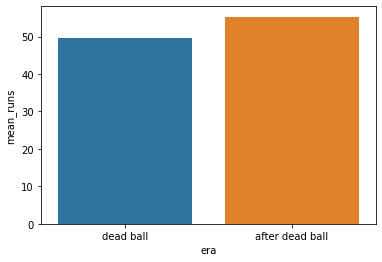

In [15]:
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
sns.barplot(x = "era", y="mean_runs", data=out_pandas)

## <font color="red"> Exercise 2 </font>

Compose the two queries into one dot-chained expression

In [17]:
# Your code here

(pitching_spark
        .where((col('yearID') >= 1900) & (col('yearID') < 1940))
        .withColumn('era', (when(col('yearID') < 1920, "dead ball")
                           .otherwise("after dead ball" )))
        .groupby(col('era'))
        .agg(mean(col('R')).alias('mean_runs'))
        .collect()
) >> to_pandas

,era,mean_runs
0,dead ball,49.707696
1,after dead ball,55.289698


## Grouping by more than one category

* `group_by` accepts multiple columns
* Groups all combinations

In [18]:
from pyspark.sql.functions import sum

(pitching_spark
 .select(col('yearID'), col('teamID'), col('W'))
 .groupby(col('yearID'), col('teamID'))
 .agg(sum(col('W')).alias('total_wins'))
 .where(col('total_wins') >= 100)
 .sort(col('yearID').asc(), col('total_wins').desc())
 .take(5)
) >> to_pandas

,yearID,teamID,total_wins
0,1892,BSN,102
1,1898,BSN,102
2,1902,PIT,102
3,1904,NY1,106
4,1905,NY1,105


## <font color="red"> Exercise 3 </font>

The query is pretty complicated.  Let's refactor the expression to improve readability.

1. Move the `when` expression out of the main query, assign it to a good name, then use the new name in the main query.
2. Do something similar with the expression inside the `where` and `agg` clauses.

In [28]:
# Your refactored code here

import pyspark.sql.functions as psf

year_more_than_1990_less_than_1940 = (col('yearID') >= 1900) & (col('yearID') < 1940)
dead_ball_no_dead_ball = (when(col('yearID') < 1920, "dead ball").otherwise("after dead ball" ))
mean_runs = psf.mean(col('R')).alias('mean_runs')

(pitching_spark
        .where(year_more_than_1990_less_than_1940)
        .withColumn('era', dead_ball_no_dead_ball)
        .groupby(col('era'))
        .agg(mean_runs)
        .collect()
) >> to_pandas

,era,mean_runs
0,dead ball,49.707696
1,after dead ball,55.289698


## The last comparison might not be fair

Comparison is only fair if pitchers all pitch the same number of outs/games/innings.  Let's see if there is a difference between the eras in terms of outs pitched (`IPouts`).

In [19]:
!pip install dfply

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
!pip install more_dfply

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## <font color="red"> Exercise 4 </font>

Below you will find the `pandas + dfply` solution that makes a more fair comparison.  Convert this piped expression to a `pyspark.sql` dot-chained expression.  Note that you will need to

1. Convert intentions to column expressions
2. Switch the `>>` to `.`
3. Switch the `dfply` function to the corresponding `pyspark.sql` method (e.g., `mutate` ==> `withColumn`)

In [29]:
#Pandas code
import pandas as pd
from dfply import *
from more_dfply import ifelse

pitching = pd.read_csv('./data/baseball/core/Pitching.csv')
mean_runs_per_out = (pitching
                     >> select(X.IPouts, X.yearID, X.R)
                     >> filter_by((X.yearID >= 1900) & (X.yearID < 1940))
                     >> group_by(X.yearID)
                     >> summarise(total_runs = X.R.sum(),
                                  total_ipouts = X.IPouts.sum())
                     >> ungroup
                     >> mutate(runs_per_out = X.total_runs/X.total_ipouts,
                               era = ifelse(X.yearID < 1920, 
                                            "dead ball", 
                                            "after dead ball"))
                     >> group_by(X.era)
                     >> summarise(mean_runs_per_out = mean(X.runs_per_out))
                    )
mean_runs_per_out

,era,mean_runs_per_out
0,after dead ball,0.182218
1,dead ball,0.149920


In [41]:
year_more_than_1990_less_than_1940 = (col('yearID') >= 1900) & (col('yearID') < 1940)
dead_ball_no_dead_ball = (when(col('yearID') < 1920, "dead ball").otherwise("after dead ball" ))
mean_runs_per_out = psf.mean(col("runs_per_out")).alias("mean_runs_per_out")

mean_runs_per_out = (pitching_spark
                     .select(col("IPouts"), col("yearID"), col("R"))
                     .where(year_more_than_1990_less_than_1940)
                     .groupby(col("yearID"))
                     .agg(psf.sum(col("R")).alias("total_runs"),
                          psf.sum(col("IPouts")).alias("total_ipouts"))
                     .withColumn("runs_per_out", col("total_runs")/col("total_ipouts"))
                     .withColumn("era", dead_ball_no_dead_ball)
                     .groupby(col("era"))
                     .agg(mean_runs_per_out)
                     .collect()
                    ) >> to_pandas
mean_runs_per_out

,era,mean_runs_per_out
0,dead ball,0.149920
1,after dead ball,0.182218


<AxesSubplot:xlabel='era', ylabel='mean_runs_per_out'>

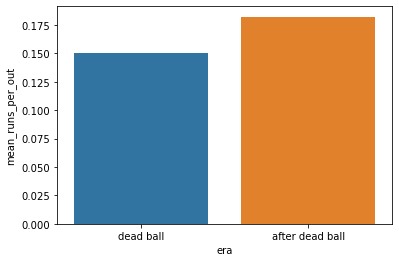

In [42]:
sns.barplot(x = "era", y="mean_runs_per_out", data=mean_runs_per_out)